## NETTOYAGE ET ANALYSE EXPLORATOIRE DES DONNEES

Dans ce notebook, je vais procéder au preprocessing des données scrapées dans un site de vente de voiture d'occasion. Les 2 jeux de données qui seront utilisées ici, sont extraits du site paruvendu.fr. On aura donc un jeu de données contenant toutes les caractérisiques mécaniques des véhicules et un jeu de donnée extrait séparément, contenant une liste des différents modèles pour chaque marque. 
On va donc retraiter ces données afin d'avoir un jeu de données exploitable pour divers usage (Analyse Exploratoire des données, Projet de ML...). 
Etant donné qu'il s'agit de données brut plusieurs retraitement devront être faits, allant du formatage des données à l'imputation des valeurs nulles que contient le jeu de données.

In [524]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import os
import numpy as np

In [525]:
os.getcwd()

'D:\\Documents\\Data_Science_Formation\\Webscraping'

In [526]:
os.chdir('D:/Documents/Data_Science_Formation/Webscraping/Mes projets/printtest/printtest/spiders')

In [527]:
# Chargement du jeu de données
pvendu = pd.read_csv('donnees.csv')

## 1-Inspection et évaluation des donnnées

In [528]:
pvendu.head(3)

,marque,prix,crit,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air
0,Opel Crossland X 1.2 Turbo 130 ch BVA6 Ultimate,\n16 950 € \n,1.0,\nNovembre 2019\n,\n52 000\nkm\n,\nEssence\n,\n113\ng/km\n,\n5.6\nlitres / 100 km\n,\nAutomatique\n,\n4 portes avec hayon\n,\n7\nCV\n,\n5\nplaces\n,\n4x4 - SUV\n,1.0
1,c3 de 20018 en 5 places,\n10 215 € \n,NaN,\nOctobre 2018\n,\n112 000\nkm\n,\nDiesel\n,\n86\ng/km\n,\n3.4\nlitres / 100 km\n,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n2\nplaces\n,\nVéhicule de société\n,NaN
2,Peugeot 208 PureTech 100 S&S BVM6 Allure Pack,\n21 000 € \n,1.0,\nNovembre 2023\n,\n3 000\nkm\n,\nEssence\n,\n114\ng/km\n,NaN,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n5\nplaces\n,\nBerline\n,1.0


In [529]:
pvendu['crit_air'].value_counts()

1.0    5577
2.0    3092
0.0     883
3.0     251
4.0      44
5.0       3
Name: crit_air, dtype: int64

In [530]:
pvendu['crit'].value_counts()

1.0    5577
2.0    3092
0.0     883
3.0     251
4.0      44
5.0       3
Name: crit, dtype: int64

A première vue nous constatons qu'un travail de reformatage des données doit être fait, on constate aussi que les valeurs de la variable Crit'air ont été extraites 2 fois, il va donc falloir supprimer de l'une des colonnes concernées

In [531]:
pvendu.drop(columns='crit', inplace=True)

In [532]:
pvendu.columns

Index(['marque', 'prix', 'annee', 'kilometrage', 'energie', 'emission_CO2',
       'conso_mixte', 'transmission', 'nb_portes', 'puissance_fiscale',
       'nb_places', 'carrosserie', 'crit_air'],
      dtype='object')

Vérifions si nous avons des doublons

In [533]:
pvendu[pvendu.duplicated(keep=False)]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air
435,BMW X6 xDrive30d 258 ch M Sport A,\n51 990 € \n,\nNovembre 2017\n,\n47 000\nkm\n,\nDiesel\n,\n159\ng/km\n,\n6.0\nlitres / 100 km\n,\nAutomatique\n,\n4 portes avec hayon\n,\n16\nCV\n,\n4\nplaces\n,\n4x4 - SUV\n,2.0
436,BMW X6 xDrive30d 258 ch M Sport A,\n51 990 € \n,\nNovembre 2017\n,\n47 000\nkm\n,\nDiesel\n,\n159\ng/km\n,\n6.0\nlitres / 100 km\n,\nAutomatique\n,\n4 portes avec hayon\n,\n16\nCV\n,\n4\nplaces\n,\n4x4 - SUV\n,2.0
551,Citroën C4 Cactus PureTech 110 S&S Shine,\n7 500 € \n,\nMars 2015\n,\n116 000\nkm\n,\nEssence\n,\n100\ng/km\n,\n4.3\nlitres / 100 km\n,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n5\nplaces\n,\n4x4 - SUV\n,1.0
576,Fiat TIPO SOCIETE 1.3 MULTIJET 95 CH BVM5 EURO...,\n8 590 € \n,\nSeptembre 2019\n,\n93 736\nkm\n,\nDiesel\n,\n108\ng/km\n,NaN,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n2\nplaces\n,\nVéhicule de société\n,2.0
590,Fiat TIPO SOCIETE 1.3 MULTIJET 95 CH BVM5 EURO...,\n8 590 € \n,\nSeptembre 2019\n,\n93 736\nkm\n,\nDiesel\n,\n108\ng/km\n,NaN,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n2\nplaces\n,\nVéhicule de société\n,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11894,Volkswagen Golf 2.0 TDI 150 BlueMotion Technol...,\n12 800 € \n,\nNovembre 2013\n,\n142 000\nkm\n,\nDiesel\n,\n117\ng/km\n,\n4.4\nlitres / 100 km\n,\nAutomatique\n,\n4 portes avec hayon\n,\n8\nCV\n,\n5\nplaces\n,\nBerline\n,2.0
11895,Citroën C4 BlueHDi 120 S&S EAT6 Millenium,\n10 400 € \n,\nNovembre 2015\n,\n83 000\nkm\n,\nDiesel\n,\n100\ng/km\n,NaN,\nAutomatique\n,\n4 portes avec hayon\n,\n6\nCV\n,\n5\nplaces\n,\nBerline\n,2.0
11896,Renault Mégane III dCi 110 FAP Energy Business,\n9 990 € \n,\nMars 2015\n,\n98 000\nkm\n,\nDiesel\n,\n90\ng/km\n,\n3.5\nlitres / 100 km\n,\nManuelle\n,\n4 portes avec hayon\n,\n5\nCV\n,\n5\nplaces\n,\nBerline\n,2.0
11908,Renault Mégane III TCE 130 Energy eco2 Zen,\n8 990 € \n,\nJanvier 2015\n,\n87 000\nkm\n,\nEssence\n,\n124\ng/km\n,\n5.4\nlitres / 100 km\n,\nManuelle\n,\n4 portes avec hayon\n,\n7\nCV\n,\n5\nplaces\n,\nBerline\n,1.0


192 doublons sont présents dans nos données. On va donc procéder à leur suppression

In [534]:
pvendu.drop_duplicates(inplace=True)
pvendu.reset_index(drop=True, inplace=True)

In [535]:
pvendu[pvendu.duplicated(keep=False)]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air


#### Reformatage des données

Dans cette section on supprimera les unités de mesures ainsi que les espaces inutiles

In [536]:
pvendu.iloc[:,1:] = pvendu.iloc[:,1:].applymap(lambda x: x.strip().replace('\r\n', '').replace(' ', '').replace('\n', '').replace
                                               ('€', '').replace('km', '').replace('g/', '').replace('litres/100', '').replace
                                               ('portesavechayon', '').replace('portes', '').replace('CV', '').replace('places', '') 
                                               if isinstance (x,str) else x)
pvendu.head(2)

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air
0,Opel Crossland X 1.2 Turbo 130 ch BVA6 Ultimate,16950,Novembre2019,52000,Essence,113,5.6,Automatique,4,7,5,4x4-SUV,1.0
1,c3 de 20018 en 5 places,10215,Octobre2018,112000,Diesel,86,3.4,Manuelle,4,5,2,Véhiculedesociété,NaN


In [537]:
pvendu['energie'].unique()

array(['Essence', 'Diesel', 'Electrique', 'Autres', 'Hybride', 'GPLouGNL',
       nan], dtype=object)

In [538]:
pvendu['transmission'].unique()

array(['Automatique', 'Manuelle', 'Semiautomatique', nan], dtype=object)

In [539]:
pvendu['carrosserie'].unique()

array(['4x4-SUV', 'Véhiculedesociété', 'Berline', 'Coupé', 'Break',
       'Cabriolet', 'Monospace', nan, 'Pick-up'], dtype=object)

In [540]:
# "Véhiculedesociété" n'étant pas un type de carrosserie on va attribuer une valeur nulle à chaque instance = "Véhiculedesociété"
for index, value in enumerate(pvendu['carrosserie']):
    if value == 'Véhiculedesociété':
        pvendu.at[index, 'carrosserie'] = np.nan

In [541]:
pvendu['crit_air'].unique()

array([ 1., nan,  2.,  0.,  3.,  4.,  5.])

In [542]:
#Suppression des mois afin de conserver uniquement l'année de fabrication des voitures
pvendu["annee"]= pvendu["annee"].str[-4:]

## 2-Séparation Marque-Modèle et nettoyage de chacune des 2 colonnes

In [543]:
marques_voitures = ["Abarth","Aixam", "Aleko", "Alfa Romeo", "Alpina occasion", "Alpine", "Aro", "Aston Martin", "Audi", "Austin", 
               "Auverland occasion", "Auverland", "Bentley", "Bertone", "BMW", "Bolloré", "Buggy","Buick", "BYD", "Cadillac", "Caterham", "Chevrolet",
               "Chrysler", "Citroën", "Corvette", "Cupra", "Dacia", "Daewoo","Daihatsu", "Daimler occasion", "Dodge", "DS",
               "Ferrari", "Fiat", "Ford", "GMC", "Honda", "Hummer", "Hyundai", "Infiniti", "Isuzu", "Jaguar", "Jeep", "Kia", 
               "Lada","Lamborghini", "Lancia", "Land-Rover", "Lexus", "Lincoln", "Lotus", "Lynk & CO", "Mahindra", "Maserati",
               "Mazda", "McLaren", "Mega", "Mercedes", "Mercury", "MG", "Mini", "Mitsubishi", "Morgan occasion", "MPM Motos",
               "Nissan", "Oldsmobile", "Opel", "Peugeot", "PGO", "Plymouth", "Pontiac", "Porsche", "Renault", "Rolls-Royce",
               "Rover", "Saab", "Santana", "Seat", "Seres", "Skoda", "Smart", "Ssangyong", "Subaru", "Suzuki", "Talbot", "Tesla",
               "Toyota", "TVR", "Volkswagen", "Volvo"]
#Insertion des marques dans une liste
list_marque = []
for marque in marques_voitures :
    list_marque.append(marque.lower())

#Tri des valeurs par longueur
list_marque = sorted(list_marque, key=len, reverse=True)

In [544]:
#Mise en minuscule de chaque caractère
pvendu['marque'] = pvendu['marque'].str.lower()

In [545]:
#fonction séparant la variable marque et modèle en 2 colonnes
def split_mot_cle(element):
    for mot_cle in list_marque:
        if mot_cle in element:  # Comparaison en ignorant la casse
            marque = mot_cle
            modele = element
            return marque, modele
    return element, element
pvendu['marque'] = pvendu['marque'].str.replace('citroen', 'citroën')
pvendu['marque'], pvendu['modele'] = zip(*pvendu['marque'].apply(split_mot_cle))

In [546]:
pvendu.marque.unique()

array(['opel', 'c3 de 20018 en 5 places', 'peugeot', 'citroën', 'dacia',
       'volvo', 'ford', 'kia', 'volkswagen', 'renault', 'hyundai',
       'capture', 'mercedes', 'bmw', 'nissan',
       'voiture 2008 gt 130cv dernière génération,  très bien en....',
       'audi', 'toyota', 'jaguar', 'skoda', 'lexus', 'mini', 'fiat',
       'abarth', 'land-rover', 'duster 4x4 prestige 110ch', 'mazda',
       'suzuki', 'rover', 'seat', 'mitsubishi', '508 gt toutes options',
       'porsche', 'mg', 'c3 picasso vti 95 bcp vitamine', 'alfa romeo',
       'tesla', 'countryman hybride rechargeable se longstone',
       "auto moto  / voiture d'occasion ", 'ds', 'maserati',
       'clio 4 iv estate dci 90',
       '308 1.6 hdi 112ch business sport gtie 12 mois', 'jeep',
       'clio 4 estate 1,5 dci 90 ch business', 'smart', 'cupra',
       'polo 1,2 70 ch trendline 77000 kms clim',
       "twingo 2 1.2 60ch edition je t 'aime  55700 kms",
       'clio iii 1,2  65 ch authentique clim  33000 kms',
     

### A-Retraitement de la colonne "marque"

In [547]:
#Fonction permettant de repérer les valeurs de la colonne 'marque' n'ayant pas d'équivalent dans la liste de marque
def non_reconnu (liste):
    liste = []
    for element in pvendu['marque'].unique() :
        if element not in list_marque:
            liste.append(element)
    return liste
non_reconnu(pvendu['marque'])

['c3 de 20018 en 5 places',
 'capture',
 'voiture 2008 gt 130cv dernière génération,  très bien en....',
 'duster 4x4 prestige 110ch',
 '508 gt toutes options',
 'c3 picasso vti 95 bcp vitamine',
 'countryman hybride rechargeable se longstone',
 "auto moto  / voiture d'occasion ",
 'clio 4 iv estate dci 90',
 '308 1.6 hdi 112ch business sport gtie 12 mois',
 'clio 4 estate 1,5 dci 90 ch business',
 'polo 1,2 70 ch trendline 77000 kms clim',
 "twingo 2 1.2 60ch edition je t 'aime  55700 kms",
 'clio iii 1,2  65 ch authentique clim  33000 kms',
 'c3 (3) bluehdi 100 bvm graphic',
 'clio v hybride',
 'clio v blue dci 85 cv  business auto ecole ',
 '207 1.6hdi 90 cv  active  5 portes',
 'clio v blue dci 100 evolution  auto ecole .',
 'twingo  3 sce 70  zen  climatisation .',
 '190 e 126 ch',
 'a4 -38% 30tdi 136cv bva+gps+cam +led+clim 3zones+sieges chauf+hayon elec+opts',
 'a4 -39% 30tdi 136cv bva+gps+cam +led+clim 3zones+sieges chauf+hayon elec+opts',
 'a4 -39% 30tdi 136cv bva+gps+cam +ful

In [548]:
pvendu.head(3)

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
0,opel,16950,2019,52000,Essence,113,5.6,Automatique,4,7,5,4x4-SUV,1.0,opel crossland x 1.2 turbo 130 ch bva6 ultimate
1,c3 de 20018 en 5 places,10215,2018,112000,Diesel,86,3.4,Manuelle,4,5,2,NaN,NaN,c3 de 20018 en 5 places
2,peugeot,21000,2023,3000,Essence,114,NaN,Manuelle,4,5,5,Berline,1.0,peugeot 208 puretech 100 s&s bvm6 allure pack


In [549]:
print(len(non_reconnu(pvendu.marque)), "valeurs de la colonne 'marque' n'ont pas trouvé ne sont pas présentes dans la liste de marque")

140 valeurs de la colonne 'marque' n'ont pas trouvé ne sont pas présentes dans la liste de marque


In [550]:
#Fonction permettant de détecter les valeurs de la colonne "marque" présents dans la liste de marque
def correspondance(liste, nom_liste):
    for index in range(pvendu.shape[0]):
        for element in liste :
            if element in pvendu.loc[index, 'marque'] :
                pvendu.loc[index, 'marque'] = nom_liste
            else :
                pvendu.loc[index, 'marque'] = pvendu.loc[index, 'marque']

In [551]:
renault = ['clio', 'capture', 'captur', 'renautl', 'twingo', 'zoe', 'scenic',
           'kadjar', 'kangoo', 'talisman', 'berlingo', 'twizy']
renault_nom = 'renault'
audi = ['a4', 'a3', 'a5', 'a6', 'e-tron', 'q5', 'rs7']
audi_nom = 'audi'
bmw = ['série', 'x4', 'x3', 'x1', 'serie']
bmw_nom = 'bmw'
peugeot = ['207', '208', '308', '3008', '406', '508', '2008', 'rcz']
peugeot_nom = 'peugeot'
volkswagen = ['tiguan', 'polo', 'golf', 'touran', 'passat']
volkswagen_nom = 'volkswagen'
ford = ['c-max', 'c-max', 'puma', 'transit', 'ecosport']
ford_nom = 'ford'
dacia = ['jogger', 'duster' ]
dacia_nom = 'dacia'
nissan = ['juke', 'pulsar', 'micra', 'qashqai', 'x-trail']
nissan_nom = 'nissan'
opel = ['crossland']
opel_nom = 'opel'
mini = ['countryman']
mini_nom = 'mini'
citroën = ['citroen', 'ami', 'c1', 'c3', 'c4', 'c5', 'thp']
citroën_nom = 'citroën'
kia = ["sportage", 't-gdi']
kia_nom = 'kia'
mitsubishi = ['eclipse']
mitsubishi_nom = 'mitsubishi' 
mercedes = ['sl', '190']
mercedes_nom = 'mercedes'
alfaromeo = ['mito']
alfaromeo_nom = 'alfa romeo'
dodge = ['ram']
dodge_nom = 'dodge'
lynkco = ['lynk&co']
lynkco_nom = 'lynk & co'
fiat = ['500 c']
fiat_nom = 'fiat'
landrover = ['sdv6']
landrover_nom = 'land-rover'
bollore = ['bolloré']
bollore_nom = 'bolloré'

In [552]:
correspondance(renault, renault_nom)
correspondance(audi, audi_nom)
correspondance(bmw, bmw_nom)
correspondance(peugeot, peugeot_nom)
correspondance(volkswagen, volkswagen_nom)
correspondance(ford, ford_nom)
correspondance(dacia, dacia_nom)
correspondance(nissan, nissan_nom)
correspondance(opel, opel_nom)
correspondance(mini, mini_nom)
correspondance(citroën, citroën_nom)
correspondance (kia, kia_nom)
correspondance(mitsubishi, mitsubishi_nom)
correspondance(mercedes, mercedes_nom)
correspondance(alfaromeo, alfaromeo_nom)
correspondance(dodge, dodge_nom)
correspondance(lynkco, lynkco_nom)
correspondance(fiat, fiat_nom)
correspondance(landrover, landrover_nom)
correspondance(bollore, bollore_nom)

In [553]:
print("il ne nous reste plus que", len(non_reconnu(pvendu.marque)), "valeurs non reconnues")

il ne nous reste plus que 4 valeurs non reconnues


In [554]:
non_reconnu(pvendu.marque)

["auto moto  / voiture d'occasion ",
 '1.6 hdi 110 fap premium pack bv6 ',
 '🥇 partner tepee1.6l hdi 90ch / 145000km / 5 places / reprise possible',
 'equipements et options :  sièges elec a mémoire,  chauf....']

In [555]:
pvendu.marque.unique()

array(['opel', 'citroën', 'peugeot', 'dacia', 'volvo', 'ford', 'kia',
       'volkswagen', 'renault', 'hyundai', 'mercedes', 'bmw', 'nissan',
       'audi', 'toyota', 'jaguar', 'skoda', 'lexus', 'mini', 'fiat',
       'abarth', 'land-rover', 'mazda', 'suzuki', 'rover', 'seat',
       'mitsubishi', 'porsche', 'mg', 'alfa romeo',
       "auto moto  / voiture d'occasion ", 'ds', 'maserati', 'jeep',
       'smart', 'cupra', 'mega', 'honda', 'lancia', 'lynk & co', 'saab',
       'aston martin', 'pontiac', '1.6 hdi 110 fap premium pack bv6 ',
       'dodge', 'buick',
       '🥇 partner tepee1.6l hdi 90ch / 145000km / 5 places / reprise possible',
       'alpine', 'infiniti', 'chevrolet', 'cadillac', 'gmc', 'lincoln',
       'hummer',
       'equipements et options :  sièges elec a mémoire,  chauf....',
       'isuzu', 'lamborghini', 'bentley', 'auverland', 'aro', 'bolloré',
       'aixam'], dtype=object)

In [556]:
#Correction manuel de quelques marques mal renseignées
for index in range(pvendu.shape[0]):
    if 'rover' in pvendu.loc[index, 'marque'] :
        pvendu.loc[index, 'marque'] = 'land-rover'
    if 'ds' in pvendu.loc[index, 'marque']:
        pvendu.loc[index, 'marque'] = 'citroën'
    if 'mega' in pvendu.loc[index, 'marque'] :
        pvendu.loc[index, 'marque'] = 'opel'

In [557]:
mask = pvendu['marque'].isin(non_reconnu(pvendu['marque']))

pvendu.loc[mask]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
307,auto moto / voiture d'occasion,9500,2017,97500,Essence,107,4.6,Manuelle,4,4,5,4x4-SUV,1.0,auto moto / voiture d'occasion
322,auto moto / voiture d'occasion,16500,2021,11600,GPLouGNL,NaN,NaN,Manuelle,4,5,5,Berline,1.0,auto moto / voiture d'occasion
331,auto moto / voiture d'occasion,11700,2018,151000,Diesel,95,3.7,Automatique,4,5,5,Break,2.0,auto moto / voiture d'occasion
1691,1.6 hdi 110 fap premium pack bv6,5490,2010,220000,Diesel,137,5.1,Manuelle,4,6,5,4x4-SUV,3.0,1.6 hdi 110 fap premium pack bv6
1788,🥇 partner tepee1.6l hdi 90ch / 145000km / 5 pl...,8990,2009,145000,Diesel,150,5.7,Manuelle,4,6,5,Monospace,3.0,🥇 partner tepee1.6l hdi 90ch / 145000km / 5 pl...
4684,auto moto / voiture d'occasion,19000,2006,123000,Essence,176,7.4,Manuelle,2,9,2,Cabriolet,2.0,auto moto / voiture d'occasion
4999,auto moto / voiture d'occasion,23700,2013,99752,Diesel,250,9.5,Automatique,4,10,5,Pick-up,2.0,auto moto / voiture d'occasion
5002,equipements et options : sièges elec a mémoir...,26920,2021,63000,Hybride,NaN,NaN,Automatique,4,8,5,Berline,1.0,equipements et options : sièges elec a mémoir...
11973,auto moto / voiture d'occasion,26000,2018,21372,Diesel,106,NaN,Manuelle,4,6,5,4x4-SUV,2.0,auto moto / voiture d'occasion


In [558]:
# On renomme de la marque de la ligne 1788
pvendu.loc[1788,'marque'] = 'peugeot'

Les quelques valeurs n'ayant pas trouvé d'équivalent, sont des valeurs mal saisies dont il est impossible de retrouver les valeurs réelles. Ce sont donc des valeurs manquantes

In [559]:
pvendu.loc[mask, 'marque'] = np.nan

### B-Retraitement de la colonne "modèle"

In [560]:
#Importation et chargement du jeu de données contenant la liste des modèles
import os
os.chdir('D:/Documents/Data_Science_Formation/Webscraping')

import json

with open('modeles_voitures.json', 'r') as f:
    modele_list = json.load(f)

print(modele_list.items())

dict_items([('Volvo', ['240', '340', '440', '460', '480', '740', '850', '940', '960', 'C30', 'C40', 'C70', 'Ex30', 'S40', 'S60', 'S70', 'S80', 'S90', 'V40', 'V50', 'V60', 'V70', 'V90', 'Xc40', 'XC60', 'XC70', 'XC90']), ('Volkswagen', ['Amarok', 'Arteon', 'Beetle', 'Bora', 'Caddy', 'Caravelle', 'COCCINELLE II', 'Corrado', 'E-golf', 'Eos', 'Fox', 'Golf', 'Golf Plus', 'Golf SW', 'Id.3', 'Id.4', 'Id 5', 'Id.7', 'Id.buzz', 'Jetta', 'Lupo', 'Multivan', 'Passat', 'Phaeton', 'Polo', 'Scirocco', 'Sharan', 'Taigo', 'T-cross', 'Tiguan', 'Tiguan allspace', 'Touareg', 'Touran', 'T-roc', 'Vento']), ('Toyota', ['4Runner', 'Auris', 'Avensis', 'Avensis Verso', 'Aygo', 'Bz4x', 'Camry', 'Carina', 'Celica', 'C-hr', 'Corolla', 'Corolla Verso', 'Escape', 'Gr86', 'GT86', 'Hiace', 'Highlander', 'Hilux', 'Land Cruiser', 'Land Cruiser SW', 'Lite Ace', 'Mirai', 'Paseo', 'Picnic', 'Previa', 'Prius', 'Proace city', 'RAV 4', 'Runner', 'Starlet', 'Supra', 'Tercel', 'Urban cruiser', 'Verso', 'Yaris', 'Yaris cross', '

In [561]:
modele_list.keys()

dict_keys(['Volvo', 'Volkswagen', 'Toyota', 'Tesla', 'Talbot', 'Suzuki', 'Subaru', 'Ssangyong', 'Smart', 'Skoda', 'Seres', 'Seat', 'Santana', 'Saab', 'Rover', 'Rolls-Royce', 'Renault', 'Porsche', 'Pontiac', 'PGO', 'Peugeot', 'Opel', 'Nissan', 'MPM Motos', 'Mitsubishi', 'Mini', 'MG', 'Mercedes', 'McLaren', 'Mazda', 'Maserati', 'Mahindra', 'Lynk & CO', 'Lotus', 'Lincoln', 'Lexus', 'Land-Rover', 'Lancia', 'Lamborghini', 'Lada', 'Kia', 'Jeep', 'Jaguar', 'Isuzu', 'Infiniti', 'Hyundai', 'Honda', 'GMC', 'Ford', 'Fiat', 'Ferrari', 'Dodge', 'Daihatsu', 'Daewoo', 'Dacia', 'Cupra', 'Citroën', 'Chrysler', 'Chevrolet', 'Caterham', 'Cadillac', 'BYD', 'Buick', 'Buggy', 'BMW', 'Bertone', 'Bentley', 'Austin', 'Audi', 'Aston Martin', 'Aro', 'Alpine', 'Alpina', 'Alfa Romeo', 'Aleko', 'Abarth'])

In [562]:
#Conversion de chaque caractère en minuscule
modele_list_lower = {}
for key, values in modele_list.items():
    key_lower = key.lower()
    values_lower = [value.lower() for value in values]
    modele_list_lower[key_lower] = values_lower

In [563]:
modele_list = modele_list_lower

In [564]:
def mot_minuscule(mot):
    if len(mot) > 0:  # Vérification si la chaîne n'est pas vide
        return mot.lower()
    else:
        return mot
    
pvendu['modele'] = pvendu['modele'].apply(mot_minuscule)

In [565]:
#Fonction détectant les valeurs de la colonne "modèle" présents dans la le dictionnaire"modele_list"

def clean_modeles(df, modele_list, marque_col='marque', modele_col='modele'):
    for index, row in df.iterrows():
        marque = row[marque_col]
        modele = row[modele_col]
        if marque in modele_list:
            modeles_disponibles = modele_list[marque]
            for model in modeles_disponibles:
                if model in modele:
                    df.at[index, modele_col] = model
                    break
    return df

pvendu = clean_modeles(pvendu, modele_list)


In [566]:
pvendu.head()

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
0,opel,16950,2019,52000,Essence,113,5.6,Automatique,4,7,5,4x4-SUV,1.0,crossland
1,citroën,10215,2018,112000,Diesel,86,3.4,Manuelle,4,5,2,NaN,NaN,c3 de 20018 en 5 places
2,peugeot,21000,2023,3000,Essence,114,NaN,Manuelle,4,5,5,Berline,1.0,208
3,peugeot,6500,2014,185000,Diesel,85,3.3,Manuelle,4,4,5,Berline,2.0,208
4,citroën,12000,2019,38000,Essence,108,5.0,Manuelle,4,4,5,Berline,1.0,citroën c3 puretech 82 s&s elle


In [567]:
# Adaptation de la fonction "non_reconnu" à la colonne "modèle"
def non_reconnu(dataframe, modele_list):
    liste = []  
    for index, row in dataframe.iterrows():  
        marque = row['marque']  
        modele = row['modele'] 
        
        if marque in modele_list:
            if modele not in modele_list[marque]:
                liste.append(modele) 
        else:
            liste.append(modele) 

    return liste  


In [568]:
len(non_reconnu(pvendu, modele_list))

2865

In [569]:
non_reconnu(pvendu, modele_list)

['c3 de 20018 en 5 places',
 'citroën c3 puretech 82 s&s elle',
 'citroën ds 3 puretech 110 s&s bvm executive',
 'citroën c3 puretech 82 confort',
 'mercedes cla coupé 200 7g-dct amg line',
 'bmw x3 xdrive20d 190ch xline',
 'audi a4 s-line s-tronic 2.0 tdi 150ch juillet 2016 couleur gris manhattan s-line',
 'mercedes glc coupé 63 s amg 9g-tronic 4matic+',
 'audi q3 35 tdi 150 ch s tronic 7 design luxe',
 'lexus nx 300h 4wd executive e-cvt',
 'citroën c4 cactus bluehdi 100 s&s bvm6 shine business',
 'fiat 500x 2.0 multijet 140 ch 4x4 at9 cross+',
 'bmw active tourer 218i 140 ch dkg7 m sport (7 cv) *, mon....',
 'bmw gran coupé 420d 190 ch bva8 m sport',
 'bmw série 1 118i m sport dkg 7 140 ch',
 'renault zoe intens gamme 2017',
 'audi a3 sportback 30 tdi 116 s line',
 'mercedes classe c break 350 e 7g-tronic plus fascination',
 'mercedes-benz gla 200 d sensation 4matic 7g-dct 29/05/20....',
 'citroën c3 puretech 68 attraction',
 'duster 4x4 prestige 110ch',
 'bmw x4 xdrive20d 190ch loun

In [570]:
#Définition des modèles manquants
modeles_manquants = {
    'citroën': ['c4 cactus', 'c1', 'c2', 'c3', 'c4', 'c5', 'c5 aircross', 'ds6', 'jumpy'],
    'bmw': ['x1', 'x2', 'x3', 'x4', 'x5', 'x6',  'xm', 'm5', "serie 1", 'serie 2', 'serie 3', 'serie 4', 'serie 5', 'serie 6', 'serie 7', 
            'serie 8', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'ix', 'z4', 'z3', 'z1'],
    'audi': ['tt rs', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 'tt'],
    'renault': ['zoe r135', 'zoe', 'scenic', 'berlingo', 'spider', 'estafette', '5'],
    'lexus': ['rx', 'nx', 'ux', 'es', 'lc', 'rc', 'rz', 'ct', 'is'],
    'jaguar': ['xf', 'xe', 'xj', 'xk'],
    'mazda': ['mazda2', 'mazda3', 'mazda5', 'mazda6', 'mx5'],
    'toyota': ['rav4', 'proace'],
    'volkswagen': ['coccinelle', 'id 5', 'id.3', 'id.4', 'id.buzz', 'golf gti', 'tiguan', 'up', 't6'],
    'mini': ['f (900 r)', 'f56', 'f55'],
    'land-rover': ['evoque'],
    'mercedes': ['classe a', 'classe c', 'classe b', 'classe e', 'classe s s600', 'c 220', 'vito', 'sprinter', 'sl', 'cls', '240d'],
    'subaru': ['xv'],
    'buick': ['riviera'],
    'ford': ['f-150', 'ford gt', 'tourneo courier', 'tourneo custom', 'grand tourneo connect', "ka", 'ka+', 'explorer', 'expedition'],
    'jeep' : ['gladiator', 'cj -7', 'expedition'],
    'chevrolet': ['suburban', 'silverado 1500'],
    'lincoln' : ['navigator', 'nautilus'],
    'dodge': ['durango'],
    'dacia': ['sandero stepway'],
    'hyundai': ['h2'],
    'porsche' : ['911'],
    'fiat' : ['500', 'ducato'],
    'opel' : ['movano', 'vivaro', 'omega', 'combo life'],
    'mg': ['zs ii', 'zs', 'tf'],
    'abarth' : ['500'],
    'peugeot': ['expert', 'boxer'],
    'cupra': ['leon', 'ateca'],
    'infiniti': ['qx50'],
    'cadillac': ['xts'],
    'bollore' : ['bluecar'],
    'hummer': ['h2', 'ev']
}


In [571]:
# Ajout des nouveaux modèles dans le dictionnaire
for marque, modeles in modeles_manquants.items():
    if marque in modele_list:
        for modele in modeles:
            if modele not in modele_list[marque]:
                modele_list[marque].append(modele)
    else:
        modele_list[marque] = modeles

In [572]:
pvendu = clean_modeles(pvendu, modele_list)

In [573]:
len(non_reconnu(pvendu, modele_list))

578

In [574]:
non_reconnu(pvendu, modele_list)

['citroën ds 3 puretech 110 s&s bvm executive',
 'mercedes cla coupé 200 7g-dct amg line',
 'mercedes glc coupé 63 s amg 9g-tronic 4matic+',
 'bmw active tourer 218i 140 ch dkg7 m sport (7 cv) *, mon....',
 'bmw gran coupé 420d 190 ch bva8 m sport',
 'bmw série 1 118i m sport dkg 7 140 ch',
 'mercedes-benz gla 200 d sensation 4matic 7g-dct 29/05/20....',
 'bmw 120d 190 ch bva8 edition sport',
 'bmw 114i 102 ch 127g lounge',
 'bmw m135i xdrive 306 ch bva8',
 'citroën ds 3 puretech 110 s&s bvm executive',
 'citroën ds 3 puretech 82 bvm5 so chic',
 'citroën ds 3 bluehdi 100 s&s bvm givenchy le makeup',
 'bmw active tourer 218d 150 ch business a',
 'bmw active tourer 218d 150 ch luxury a',
 'mg ehs 1.5t gdi phev comfort',
 'bmw gran tourer 218d 150 ch bva8 business design',
 'citroën ds 3 puretech 110 bva so chic',
 "auto moto  / voiture d'occasion ",
 'ds 7 hybride 360 cv',
 'bmw 540d xdrive 320 ch bva8 m sport',
 "auto moto  / voiture d'occasion ",
 "auto moto  / voiture d'occasion ",
 '

Certaines valeurs ne sont pas reconnues en raison des accents

In [575]:
# Suppression des accents de la colonne "modèle"

def del_accents(s):
    accents = {'a': 'àáâãäå', 'e': 'èéêë', 'i': 'ìíîï', 'o': 'òóôõö', 'u': 'ùúûü', 'y': 'ýÿ'}
    for char, accented_chars in accents.items():
        for accented_char in accented_chars:
            s = s.replace(accented_char, char)
    return s

pvendu['modele'] = [del_accents(element.lower()) for element in pvendu['modele']]

In [576]:
# Suppression des accents du dictionnaire "modele_list"

def remove_accents_from_dict(d):
    for key, value in d.items():
        if isinstance(value, str):
            d[key] = del_accents(value)
        elif isinstance(value, list):
            d[key] = [del_accents(item) for item in value]
        elif isinstance(value, dict):
            remove_accents_from_dict(value)
    return d

modele_list = remove_accents_from_dict(modele_list)

In [577]:
pvendu = clean_modeles(pvendu, modele_list)

In [578]:
#Renommons les valeurs mal orthographiées 

serie_1 = ['1 hatchback business design / 116da 7-dct', '116i 109 ch lounge', 'bmw 114i 102 ch 127g lounge', 'm135i xdrive', '120d 190', '118d 143', 
           '118i', 'm140i']
serie_2 = ['gran tourer', 'active tourer', 'm2', '220d 190']
serie_3 = ['325i', 'm3', 'bmw touring 318d 143 ch 119 g business a', 'gran turismo', '325d 197']
serie_4 = ['gran coupe', 'm4']
serie_5 = ['530d excellis a', 'bmw 520i', '530d 258 ch luxury a', '540d xdrive', '520d xdrive', '530d xdrive']
serie_6 = ['650ci steptronic a']
serie_7 = ['730d xdrive']


for index in range(pvendu.shape[0]):
    modele_value = pvendu.loc[index, 'modele']

    if any(element in modele_value for element in serie_1):
        pvendu.loc[index, 'modele'] = 'serie 1'
    elif any(element in modele_value for element in serie_2) :
        pvendu.loc[index, 'modele'] = 'serie 2'
    elif any(element in modele_value for element in serie_3):
        pvendu.loc[index, 'modele'] = 'serie 3'
    elif any(element in modele_value for element in serie_4):
        pvendu.loc[index, 'modele'] = 'serie 4'
    elif any(element in modele_value for element in serie_5):
        pvendu.loc[index, 'modele'] = 'serie 5'
    elif any(element in modele_value for element in serie_6):
        pvendu.loc[index, 'modele'] = 'serie 6'
    elif any(element in modele_value for element in serie_7):
        pvendu.loc[index, 'modele'] = 'serie 7'


In [579]:
#On refait la même chose pour les autres marques
megane_4 = ["ne iv", "ne 4 iv dci 115 bvm6"]
model_3 = ["3 awd long range"]
id_3 = ['id3 tour pro s 77 kwh']
mazda_2 =  ['mazda 2 hybrid 1.5 hybrid 116ch pure', 'mazda 2 1.3 mzr 84ch ao 5p']
golf_gti = ['gti 1800 pirelli chassis e']
sandero_stepway = ['sableero - 1.2 i ambiance - bleu', 'sableero - stepway - gris', 
                   'sableero - 1.5dci 90cv stepway 189.900kms annee 02/2016 - rouge metallise']
peugeot_107 = ['trendy']
renault_19 = ['19 1.9 d rn']
renault_5 = ['5 laureate tbo']
fiat_500 = ['ch hybride bsg dolcevita s & s']
ds_3 = ['citroën ds 3 puretech 110 s&s bvm executive','ds  3 1.6 thp 206ch racing clim regulateur gps']

for index in range(pvendu.shape[0]):
    modele_value = pvendu.loc[index, 'modele']

    if any(element in modele_value for element in megane_4):
        pvendu.loc[index, 'modele'] = 'megane iv'
    elif any(element in modele_value for element in model_3):
        pvendu.loc[index, 'modele'] = 'model 3'
    elif any(element in modele_value for element in id_3):
        pvendu.loc[index, 'modele'] = 'id.3'
    elif any(element in modele_value for element in mazda_2):
        pvendu.loc[index, 'modele'] = 'mazda2'
    elif any(element in modele_value for element in golf_gti):
        pvendu.loc[index, 'modele'] = 'golf gti'
    elif any(element in modele_value for element in sandero_stepway):
        pvendu.loc[index, 'modele'] = 'sandero stepway'
    elif any(element in modele_value for element in peugeot_107):
        pvendu.loc[index, 'modele'] = '107'
    elif any(element in modele_value for element in renault_19):
        pvendu.loc[index, 'modele'] = '19'
    elif any(element in modele_value for element in renault_5):
        pvendu.loc[index, 'modele'] = '5'
    elif any(element in modele_value for element in fiat_500):
        pvendu.loc[index, 'modele'] = '500'
    elif any(element in modele_value for element in ds_3):
        pvendu.loc[index, 'modele'] = 'ds3'


In [580]:
pvendu = clean_modeles(pvendu, modele_list)

In [581]:
len(non_reconnu(pvendu, modele_list))

370

In [582]:
#on renomme le modèle mg.ehs en ehs
modele_list['mg'][3] = 'ehs'

In [583]:
#Suppression de l'espace des modèles présents dans certains modèles
for num in range(10):
    for index in range(pvendu.shape[0]):
        modele = pvendu.loc[index, 'modele']
        if f'ds {num}' in modele:
            pvendu.loc[index, 'modele'] = modele.replace(f'ds {num}', f'ds{num}')
        elif f'mazda {num}' in modele:
            pvendu.loc[index, 'modele'] = modele.replace(f'mazda {num}', f'mazda{num}')
        elif f'id. {num}' in modele:
            pvendu.loc[index, 'modele'] = modele.replace(f'id. {num}', f'id.{num}')
        elif f'rav {num}' in modele:
            pvendu.loc[index, 'modele'] = modele.replace(f'rav {num}', f'rav{num}')

In [584]:
#Correction de l'orthographe de certains modèles

for index in range(pvendu.shape[0]) :
    if 'cla' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] ='classe cla'
    elif 'gla' in pvendu.loc[index, 'modele'] :
        pvendu.loc[index, 'modele'] = 'classe gla'
    elif 'glc' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'classe glc'
    elif 'gle' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'classe gle'
    elif 'gls' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'classe gls'
    elif '500x' in pvendu.loc[index, 'modele'] :
        pvendu.loc[index, 'modele'] = '500 x'
    elif 'model 3' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'model 3'
    elif 'id.5' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'id 5'
    elif 'id. 3' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'id.3'
    elif 'id. buzz' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'id.buzz'
    elif 'b max ' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'b-max '
    elif 'tepee1.6l' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele']= 'tepee'
    elif ' s ' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'cooper s'
    elif 'range r' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'range rover'
    elif 'mx5' in pvendu.loc[index, 'modele'] :
        pvendu.loc[index, 'modele'] = 'mx-5'
    elif "cee'd" in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'ceed'
    elif 'sandera' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'sandero'
    elif 'rx8' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele']= 'rx-8'
    elif 't cross' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 't-cross'
    elif 'a180' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'classe a'
    elif '19' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'r19'
    elif 'continental coupe gt' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'continental gt'
    elif 'citroen 2' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele']= 'c2'
    elif 'rav-4' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'rav4'
    elif 'smart ii ' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'fortwo'
    elif 'vi s600' in pvendu.loc[index, 'modele'] :
        pvendu.loc[index, 'modele'] = 'classe s s600'
    elif 'clio 3' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele'] = 'clio iii'
    elif 'for two' in pvendu.loc[index, 'modele']:
        pvendu.loc[index, 'modele']= 'fortwo'

In [585]:
pvendu = clean_modeles(pvendu, modele_list)

In [586]:
print("A présent on se retrouve avec", len(non_reconnu(pvendu, modele_list)), "modèles non reconnus")

A présent on se retrouve avec 92 modèles non reconnus


In [587]:
non_reconnu(pvendu, modele_list)

['r19',
 "auto moto  / voiture d'occasion ",
 "auto moto  / voiture d'occasion ",
 "auto moto  / voiture d'occasion ",
 'r19',
 'megane iv',
 'kia ',
 'mercedes ',
 'r19',
 'megane iv',
 'classe gle',
 'classe gle',
 'r19',
 'bayon -24% 1.0 t-gdi 100cv+cam +mirrorlink+cam+full led+clim auto+options',
 'serie 3',
 'tiguan 2.0 tdi 150cv carat pack r-line dsg7',
 'z4 g29 roadster sdrive 30i 258 ch bva8 (15cv) m sport',
 'r19',
 'r19',
 '1.6 hdi 110 fap premium pack bv6 ',
 'jeep willys ford gpw , aus sammlung',
 'classe gle',
 'tepee',
 'serie 3',
 'classe gle',
 'r19',
 'mini mini jcw 231',
 'classe gle',
 'classe gle',
 'jeep compass 1.5 turbo t4 130ch mhev upland 4x2 bvr7 touvrant pano gps alpine sound',
 'classe gle',
 'classe gla',
 'classe gle',
 'classe gle',
 'jeep compass 1.3 phev t4 240ch 4xe trailhawk at6 eawd camera gps hi-fi alpine',
 'fiat divers\xa0\xa0',
 'classe gla',
 "auto moto  / voiture d'occasion ",
 'classe gle',
 'classe gla',
 'classe gla',
 'classe gle',
 'classe

In [588]:
mask = pvendu['modele'].isin(non_reconnu(pvendu, modele_list))
print('La plupart des modèles sont à présent bien ortographiés, seul', pvendu[mask].shape[0],'entrées sont manquants')

La plupart des modèles sont à présent bien ortographiés, seul 161 entrées sont manquants


In [589]:
mask = pvendu['modele'].isin(non_reconnu(pvendu, modele_list))
pvendu[mask]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
107,mercedes,32600,2021,26500,Electrique,NaN,NaN,Automatique,4,6,5,4x4-SUV,0.0,r19
307,NaN,9500,2017,97500,Essence,107,4.6,Manuelle,4,4,5,4x4-SUV,1.0,auto moto / voiture d'occasion
322,NaN,16500,2021,11600,GPLouGNL,NaN,NaN,Manuelle,4,5,5,Berline,1.0,auto moto / voiture d'occasion
331,NaN,11700,2018,151000,Diesel,95,3.7,Automatique,4,5,5,Break,2.0,auto moto / voiture d'occasion
631,mercedes,33890,2021,37500,Electrique,NaN,NaN,Automatique,4,6,5,4x4-SUV,NaN,r19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11832,peugeot,,2019,50404,Diesel,106,NaN,Manuelle,4,6,5,Berline,2.0,peugeot
11833,skoda,,2020,99563,Diesel,105,NaN,Automatique,4,6,5,Berline,2.0,skoda
11973,NaN,26000,2018,21372,Diesel,106,NaN,Manuelle,4,6,5,4x4-SUV,2.0,auto moto / voiture d'occasion
12042,citroën,46990,2016,81250,Essence,194,8.4,Automatique,2,26,4,Cabriolet,NaN,vends


Les modèles restants sont des éléments mal saisis qui ne sont pas affiliés à la marque appropriée. Il s'agit donc de valeurs manquantes

In [590]:
pvendu.loc[mask,'modele']= np.nan

## 3-Conversion des types de données

In [591]:
pvendu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             12131 non-null  object 
 1   prix               12140 non-null  object 
 2   annee              12132 non-null  object 
 3   kilometrage        12132 non-null  object 
 4   energie            11374 non-null  object 
 5   emission_CO2       7513 non-null   object 
 6   conso_mixte        1438 non-null   object 
 7   transmission       11184 non-null  object 
 8   nb_portes          11098 non-null  object 
 9   puissance_fiscale  11150 non-null  object 
 10  nb_places          11669 non-null  object 
 11  carrosserie        10874 non-null  object 
 12  crit_air           9770 non-null   float64
 13  modele             11979 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.3+ MB


In [592]:
pvendu['prix'] = pd.to_numeric(pvendu['prix'], errors = 'coerce')
pvendu['kilometrage'] =pvendu.kilometrage.astype('float')

In [593]:
pvendu['annee'] = pvendu['annee'].astype('Int64')
pvendu['emission_CO2']=pvendu.emission_CO2.astype('float')
pvendu['conso_mixte'] = pvendu.conso_mixte.astype('float')
pvendu['nb_portes'] = pvendu.nb_portes.astype('Int64')

pvendu['nb_portes']= pvendu.nb_portes.astype('Int64')
pvendu['puissance_fiscale'] = pvendu.puissance_fiscale.astype('Int64')
pvendu['nb_places'] = pvendu.nb_places.astype('Int64')
pvendu['crit_air'] = pvendu['crit_air'].astype('object')

In [594]:
pvendu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12140 entries, 0 to 12139
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   marque             12131 non-null  object 
 1   prix               12090 non-null  float64
 2   annee              12132 non-null  Int64  
 3   kilometrage        12132 non-null  float64
 4   energie            11374 non-null  object 
 5   emission_CO2       7513 non-null   float64
 6   conso_mixte        1438 non-null   float64
 7   transmission       11184 non-null  object 
 8   nb_portes          11098 non-null  Int64  
 9   puissance_fiscale  11150 non-null  Int64  
 10  nb_places          11669 non-null  Int64  
 11  carrosserie        10874 non-null  object 
 12  crit_air           9770 non-null   object 
 13  modele             11979 non-null  object 
dtypes: Int64(4), float64(4), object(6)
memory usage: 1.3+ MB


## 4-Traitement des valeurs aberrantes

In [595]:
pvendu.describe()

,prix,annee,kilometrage,emission_CO2,conso_mixte,nb_portes,puissance_fiscale,nb_places
count,1.209000e+04,12132.000000,1.213200e+04,7513.000000,1438.000000,11098.000000,11150.000000,11669.000000
mean,2.692314e+04,2018.621662,6.179943e+04,121.558765,5.281711,4.007749,7.646906,13.464393
std,3.360817e+04,4.653215,5.305194e+04,40.650063,1.702385,0.743318,10.849523,810.385804
min,7.490000e+02,1942.000000,-8.000000e+03,1.000000,1.100000,2.000000,1.000000,2.000000
25%,1.395000e+04,2017.000000,2.101200e+04,108.000000,4.300000,4.000000,5.000000,5.000000
50%,1.949800e+04,2020.000000,5.029800e+04,120.000000,5.000000,4.000000,6.000000,5.000000
75%,2.843875e+04,2021.000000,9.011250e+04,135.000000,5.800000,4.000000,8.000000,5.000000
max,1.213000e+06,2024.000000,1.690000e+06,1380.000000,16.000000,7.000000,598.000000,86500.000000


#### Analyse de la colonne prix

In [596]:
pvendu[pvendu.prix == 1213000]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
9714,dodge,1213000.0,2023,483.0,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,NaN,NaN,challenger


In [597]:
pvendu['prix'] = pvendu['prix'].replace({1213000.0: np.nan})

#### Analyse de la colonne 'kilometrage'

In [598]:
pvendu[pvendu['kilometrage'] == max(pvendu['kilometrage'])]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
689,renault,7000.0,2010,1690000.0,Diesel,149.0,5.8,Manuelle,2,7,4,Cabriolet,3.0,megane


La valeur kilométrique est sans aucun doute erronée. Il est très peu probable qu'un véhicule de cette année-là ait autant de km. Après vérification sur le site on s'aperçoit qu'il y a dû avoir une erreur de saisie et que le propriétaire du véhicule a ajouté un 0 en plus par accident.

In [599]:
pvendu.loc[689, 'kilometrage'] = 169000

In [600]:
pvendu[pvendu['kilometrage'] == min(pvendu.kilometrage)]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
105,renault,30000.0,2023,-8000.0,Hybride,108.0,NaN,Automatique,4,5,5,4x4-SUV,1.0,captur


In [601]:
pvendu.loc[105, 'kilometrage'] = 8000

#### Analyse de la colonne 'emission_CO2'

In [602]:
pvendu[pvendu['emission_CO2'] == min(pvendu['emission_CO2'])]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
961,mg,49950.0,2020,14660.0,Electrique,1.0,NaN,Automatique,4,<NA>,5,4x4-SUV,0.0,NaN
2926,toyota,29999.0,2023,6450.0,Electrique,1.0,NaN,Automatique,4,7,5,Berline,0.0,proace city
5965,mercedes,30490.0,2022,17978.0,Essence,1.0,NaN,Semiautomatique,4,7,5,Berline,1.0,classe cla
8807,mg,38800.0,2023,2650.0,NaN,1.0,NaN,NaN,<NA>,<NA>,5,NaN,NaN,marvel


Il est très peu probable qu'un véhicule fonctionnant à l'essence ait une emission Co2 quasiment nulle. Considérons donc cette valeur comme manquante

In [603]:
pvendu.loc[5965, 'emission_CO2'] = np.nan

In [604]:
pvendu[pvendu['emission_CO2'] == max(pvendu['emission_CO2'])]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
8821,peugeot,37700.0,2023,2300.0,NaN,1380.0,NaN,NaN,<NA>,<NA>,5,NaN,NaN,408


In [605]:
#La valeur 1380 pour un véhicule de cette année là est surement une erreur de saisie
pvendu.loc[8821, 'emission_CO2'] = 138

#### Analyse de la colonne nb_portes

In [606]:
pvendu['nb_portes'].value_counts()

4    7998
5    2091
2    1006
6       2
7       1
Name: nb_portes, dtype: Int64

In [607]:
pvendu[pvendu['nb_portes'] == 7]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
8010,bmw,7790.0,2020,11200.0,Essence,99.0,NaN,Manuelle,7,9,2,NaN,1.0,NaN


In [608]:
pvendu.drop(8010, inplace=True)
pvendu.reset_index(drop=True, inplace=True)

#### Analyse de la colonne "nb_places"

In [609]:
pvendu[pvendu['nb_places']>10]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele
4764,kia,15250.0,2018,86500.0,Diesel,119.0,4.6,Manuelle,4,6,86500,4x4-SUV,2.0,sportage
12005,seat,23750.0,2021,135.0,Hybride,NaN,NaN,Automatique,4,8,13500,Berline,1.0,leon


In [610]:
pvendu.loc[[4764,12005], 'nb_places'] = np.nan

In [611]:
pvendu.describe()

,prix,annee,kilometrage,emission_CO2,conso_mixte,nb_portes,puissance_fiscale,nb_places
count,12088.000000,12131.000000,12131.000000,7511.000000,1438.000000,11097.000000,11149.000000,11666.000000
mean,26826.598114,2018.621548,61679.537548,121.412462,5.281711,4.007479,7.646784,4.895765
std,31831.880970,4.653390,50958.284190,37.947381,1.702385,0.742809,10.850003,0.649524
min,749.000000,1942.000000,50.000000,1.000000,1.100000,2.000000,1.000000,2.000000
25%,13950.000000,2017.000000,21019.000000,108.000000,4.300000,4.000000,5.000000,5.000000
50%,19498.000000,2020.000000,50300.000000,120.000000,5.000000,4.000000,6.000000,5.000000
75%,28416.250000,2021.000000,90121.000000,135.000000,5.800000,4.000000,8.000000,5.000000
max,718400.000000,2024.000000,999999.000000,396.000000,16.000000,6.000000,598.000000,9.000000


## 5-Traitement des valeurs nulles

In [612]:
pvendu.isnull().sum()/pvendu.shape[0]*100

marque                0.074141
prix                  0.420133
annee                 0.065903
kilometrage           0.065903
energie               6.310240
emission_CO2         38.125051
conso_mixte          88.153884
transmission          7.875443
nb_portes             8.583903
puissance_fiscale     8.155532
nb_places             3.896532
carrosserie          10.420957
crit_air             19.523849
modele                1.318066
dtype: float64

### A - Variables catégorielles

In [613]:
pvendu.shape

(12139, 14)

Dans cette section, on va remplacer les valeurs manquantes par une valeur modale groupée. Cela signifie qu'on va regrouper les données par marque et modèle pour déterminer la valeur la plus fréquente (mode) et l'utiliser pour combler les valeurs manquantes. Ensuite, on regroupera les données par marque, et les valeurs manquantes restantes seront remplacées par la valeur modale correspondante

#### Imputation valeur nulles de la variable "energie"

In [614]:
group_energie = pvendu.loc[pvendu["energie"].notna()]
group_energie = group_energie.groupby(["marque", "modele"])["energie"].agg(lambda x:x.value_counts().index[0]).rename("mode_energie").reset_index()
group_energie

,marque,modele,mode_energie
0,abarth,500,Essence
1,abarth,595,Essence
2,abarth,695,Essence
3,alfa romeo,147,Essence
4,alfa romeo,156,Diesel
...,...,...,...
454,volvo,v40,Diesel
455,volvo,v60,Diesel
456,volvo,v90,Diesel
457,volvo,xc60,Autres


In [615]:
pvendu_mode_imp = pvendu.merge(group_energie, how="left", on=["marque", "modele"]) 
pvendu_mode_imp["energie"] = pvendu_mode_imp["energie"].fillna(pvendu_mode_imp["mode_energie"])
pvendu_mode_imp

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele,mode_energie
0,opel,16950.0,2019,52000.0,Essence,113.0,5.6,Automatique,4,7,5,4x4-SUV,1.0,crossland,Essence
1,citroën,10215.0,2018,112000.0,Diesel,86.0,3.4,Manuelle,4,5,2,NaN,NaN,c3,Essence
2,peugeot,21000.0,2023,3000.0,Essence,114.0,NaN,Manuelle,4,5,5,Berline,1.0,208,Essence
3,peugeot,6500.0,2014,185000.0,Diesel,85.0,3.3,Manuelle,4,4,5,Berline,2.0,208,Essence
4,citroën,12000.0,2019,38000.0,Essence,108.0,5.0,Manuelle,4,4,5,Berline,1.0,c3,Essence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12134,opel,9495.0,2016,58000.0,Diesel,107.0,4.0,Manuelle,4,4,5,Berline,2.0,corsa,Essence
12135,peugeot,8250.0,2015,65000.0,Essence,99.0,4.3,Manuelle,2,4,5,Berline,1.0,208,Essence
12136,nissan,11990.0,2015,134000.0,Diesel,99.0,3.8,Manuelle,4,5,5,4x4-SUV,2.0,qashqai,Essence
12137,citroën,11900.0,2018,54000.0,Essence,109.0,4.7,Manuelle,4,4,5,Berline,1.0,c3,Essence


In [616]:
pvendu_mode_imp[pvendu_mode_imp.energie.isnull()]

,marque,prix,annee,kilometrage,energie,emission_CO2,conso_mixte,transmission,nb_portes,puissance_fiscale,nb_places,carrosserie,crit_air,modele,mode_energie
1003,bmw,19990.0,2020,60164.0,NaN,NaN,NaN,NaN,<NA>,5,4,NaN,0.0,i3,NaN
1136,bmw,58900.0,2022,12800.0,NaN,NaN,NaN,NaN,<NA>,7,5,NaN,NaN,i4,NaN
2057,bmw,20999.0,2019,36814.0,NaN,NaN,NaN,NaN,<NA>,3,4,NaN,0.0,i3,NaN
2067,bmw,62999.0,2023,9979.0,NaN,NaN,NaN,NaN,<NA>,6,5,NaN,0.0,ix3,NaN
2069,bmw,72999.0,2022,15580.0,NaN,NaN,NaN,NaN,<NA>,7,5,NaN,0.0,ix,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9845,bmw,24499.0,2019,29402.0,NaN,NaN,NaN,NaN,<NA>,3,4,NaN,0.0,i3,NaN
11084,bmw,16499.0,2016,82181.0,NaN,NaN,NaN,NaN,<NA>,3,4,NaN,0.0,i3,NaN
11120,bmw,57998.0,2023,12661.0,NaN,NaN,NaN,NaN,<NA>,7,5,NaN,1.0,i4,NaN
11126,bmw,23999.0,2021,40645.0,NaN,NaN,NaN,NaN,<NA>,5,4,NaN,0.0,i3,NaN


In [617]:
#on sait que le modèle de BMW ci-dessus sont des modèles électriques
mask = pvendu_mode_imp['modele'].isin(['i3', 'i4', 'ix', 'ix3', 'i7'])
pvendu_mode_imp.loc[mask, 'energie'] = 'Electrique'

In [618]:
#Imputation des valeurs nulles restantes par le mode la colonne énergie pour chaque marque
mode_en_marque = pvendu.loc[pvendu["energie"].notna()]
mode_en_marque = mode_en_marque.groupby("marque")["energie"].agg(lambda x:x.value_counts().index[0]).rename("mode_energie_marque").reset_index()
pvendu_mode_imp = pvendu.merge(mode_en_marque, how="left", on="marque") # merge of the support column with the dataframe
pvendu_mode_imp["energie"] = pvendu_mode_imp["energie"].fillna(pvendu_mode_imp["mode_energie_marque"]) # fill nan values with the mode of fuel_type

#### Imputation valeur nulles de la variable "transmission

In [619]:
#Imputation par le mode de la variable transmission
group_transmission = pvendu_mode_imp.loc[pvendu["transmission"].notna()]
group_transmission = group_transmission.groupby(["marque", 'modele'])["transmission"].agg(lambda x:x.value_counts().index[0]).rename("mode_transmission").reset_index()
pvendu_mode_imp_2 = pvendu_mode_imp.merge(group_transmission, how="left", on=["marque", "modele"]) # merge of the support column with the dataframe
pvendu_mode_imp_2["transmission"] = pvendu_mode_imp_2["transmission"].fillna(pvendu_mode_imp_2["mode_transmission"]) # fill nan values with the mode of fuel_type

In [620]:
pvendu_mode_imp_2["transmission"].isnull().sum()

176

In [621]:
#Imputation des valeurs nulles restantes par le mode la colonne transmission pour chaque marque
group_transmission = pvendu_mode_imp.loc[pvendu["transmission"].notna()]
group_transmission = group_transmission.groupby(["marque"])["transmission"].agg(lambda x:x.value_counts().index[0]).rename("mode_trans_marque").reset_index()
pvendu_mode_imp_2 = pvendu_mode_imp.merge(group_transmission, how="left", on=["marque"]) # merge of the support column with the dataframe
pvendu_mode_imp_2["transmission"] = pvendu_mode_imp_2["transmission"].fillna(pvendu_mode_imp_2["mode_trans_marque"])

print('il reste',pvendu_mode_imp_2["transmission"].isnull().sum(), 'valeurs nulles')

il reste 21 valeurs nulles


#### Imputation valeur nulles de la variable "carrosserie"

In [622]:
#Imputation par le mode de la variable carrosserie
group_carrosserie = pvendu_mode_imp_2.loc[pvendu["carrosserie"].notna()]
group_carrosserie = group_carrosserie.groupby(["marque", "modele"])["carrosserie"].agg(lambda x:x.value_counts().index[0]).rename("mode_carrosserie").reset_index()
pvendu_mode_imp_3 = pvendu_mode_imp_2.merge(group_carrosserie, how="left", on=["marque", "modele"]) # merge of the support column with the dataframe
pvendu_mode_imp_3["carrosserie"] = pvendu_mode_imp_3["carrosserie"].fillna(pvendu_mode_imp_3["mode_carrosserie"]) # fill nan values with the mode of fuel_type

In [623]:
#Imputation des valeurs nulles restantes par le mode la colonne transmission pour chaque marque
group_carrosserie = pvendu_mode_imp_2.loc[pvendu["carrosserie"].notna()]
group_carrosserie = group_carrosserie.groupby(["marque"])["carrosserie"].agg(lambda x:x.value_counts().index[0]).rename("mode_carross_marque").reset_index()
pvendu_mode_imp_3 = pvendu_mode_imp_2.merge(group_carrosserie, how="left", on=["marque"]) # merge of the support column with the dataframe
pvendu_mode_imp_3["carrosserie"] = pvendu_mode_imp_3["carrosserie"].fillna(pvendu_mode_imp_3["mode_carross_marque"]) # fill nan values with the mode of fuel_type

print('Il ne reste plus que', pvendu_mode_imp_3["carrosserie"].isnull().sum(), 'valeurs nulles')

Il ne reste plus que 22 valeurs nulles


#### Imputation valeurs nulles de la variable "crit_air"

In [624]:
#Imputation par le mode de la variable crit'air
group_critair = pvendu_mode_imp_3.loc[pvendu["crit_air"].notna()]
group_critair = group_critair.groupby(["marque", "modele"])["crit_air"].agg(lambda x:x.value_counts().index[0]).rename("mode_critair").reset_index()
pvendu_mode_imp_4 = pvendu_mode_imp_3.merge(group_critair, how="left", on=["marque", "modele"]) # merge of the support column with the dataframe
pvendu_mode_imp_4["crit_air"] = pvendu_mode_imp_4["crit_air"].fillna(pvendu_mode_imp_4["mode_critair"]) # fill nan values with the mode of fuel_type

In [625]:
#Imputation des valeurs nulles restantes par le mode la colonne crit'air pour chaque marque
group_critair = pvendu_mode_imp_3.loc[pvendu["crit_air"].notna()]
group_critair = group_critair.groupby(["marque"])["crit_air"].agg(lambda x:x.value_counts().index[0]).rename("mode_critair_marque").reset_index()
pvendu_mode_imp_4 = pvendu_mode_imp_3.merge(group_critair, how="left", on=["marque"]) # merge of the support column with the dataframe
pvendu_mode_imp_4["crit_air"] = pvendu_mode_imp_4["crit_air"].fillna(pvendu_mode_imp_4["mode_critair_marque"]) # fill nan values with the mode of fuel_type

print('Il ne reste plus que', pvendu_mode_imp_4["crit_air"].isnull().sum(), 'valeurs nulles')

Il ne reste plus que 24 valeurs nulles


In [626]:
pvendu = pvendu_mode_imp_4.iloc[:,:14]

In [627]:
#Suppression des valeurs manquantes qui restent 
obj_col= pvendu.select_dtypes(include=['object']).dropna()
pvendu = pvendu.dropna(subset=obj_col.columns)
pvendu.isnull().sum()

marque                   0
prix                    45
annee                    8
kilometrage              8
energie                  0
emission_CO2          4536
conso_mixte          10547
transmission             0
nb_portes              993
puissance_fiscale      942
nb_places              430
carrosserie              0
crit_air                 3
modele                   0
dtype: int64

In [628]:
pvendu.shape

(11958, 14)

### B - Variables numériques

In [629]:
valeurs_nulles = pvendu.isnull().sum()/pvendu.shape[0]*100
valeurs_nulles

marque                0.000000
prix                  0.376317
annee                 0.066901
kilometrage           0.066901
energie               0.000000
emission_CO2         37.932765
conso_mixte          88.200368
transmission          0.000000
nb_portes             8.304064
puissance_fiscale     7.877572
nb_places             3.595919
carrosserie           0.000000
crit_air              0.025088
modele                0.000000
dtype: float64

In [630]:
for element, value in valeurs_nulles.items():
    if value <1:     
        pvendu = pvendu.dropna(subset=[element])

In [631]:
pvendu.isnull().sum()/pvendu.shape[0]*100

marque                0.000000
prix                  0.000000
annee                 0.000000
kilometrage           0.000000
energie               0.000000
emission_CO2         37.843516
conso_mixte          88.309942
transmission          0.000000
nb_portes             8.303219
puissance_fiscale     7.840995
nb_places             3.521304
carrosserie           0.000000
crit_air              0.000000
modele                0.000000
dtype: float64

In [632]:
#Avec près de 90% de valeurs nulles, nous procédons à la suppression de la variable 'conso_mixte'.
pvendu.drop(columns = ['conso_mixte'], inplace= True)

In [633]:
pvendu.isnull().sum()/pvendu.shape[0]*100

marque                0.000000
prix                  0.000000
annee                 0.000000
kilometrage           0.000000
energie               0.000000
emission_CO2         37.843516
transmission          0.000000
nb_portes             8.303219
puissance_fiscale     7.840995
nb_places             3.521304
carrosserie           0.000000
crit_air              0.000000
modele                0.000000
dtype: float64

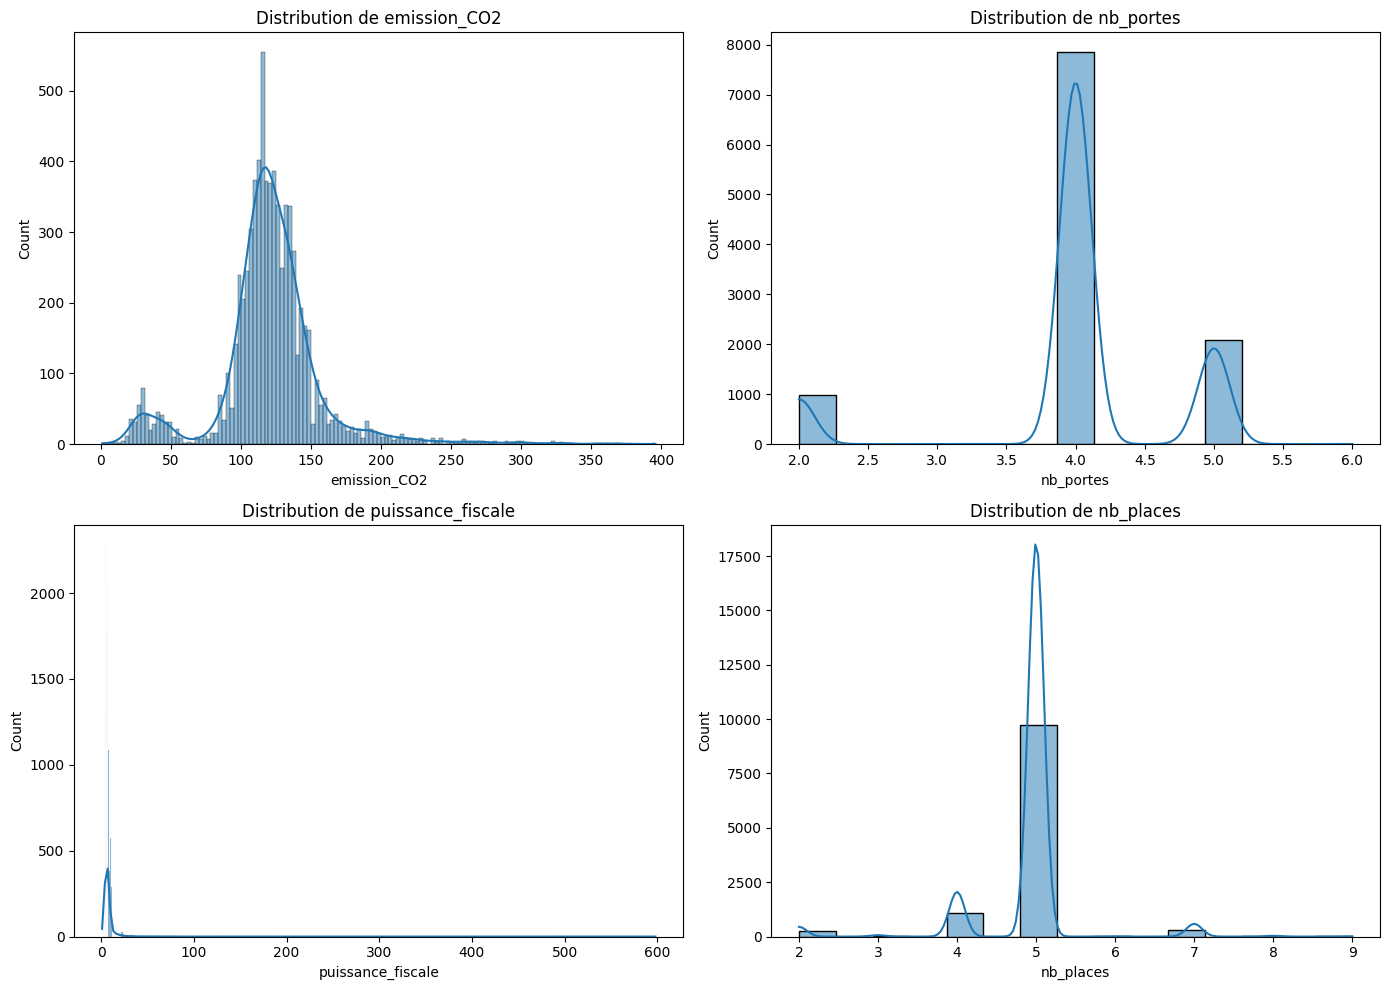

In [634]:
#Distribution des variables numériques contenant des Nan
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Liste des variables
variables = ['emission_CO2', 'nb_portes', 'puissance_fiscale', 'nb_places']

# Traçage des distributions
for ax, var in zip(axes.flatten(), variables):
    sns.histplot(pvendu[var].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution de {var}')

plt.tight_layout()
plt.show()

In [635]:
pvendu.describe()

,prix,annee,kilometrage,emission_CO2,nb_portes,puissance_fiscale,nb_places,crit_air
count,11899.000000,11899.000000,11899.000000,7396.000000,10911.000000,10966.000000,11480.0000,11899.000000
mean,26553.665098,2018.679049,61401.666106,121.152109,4.012556,7.607697,4.8973,1.277670
std,31564.261044,4.419023,50845.739413,37.531614,0.740555,10.896036,0.6496,0.642435
min,749.000000,1962.000000,50.000000,1.000000,2.000000,1.000000,2.0000,0.000000
25%,13900.000000,2017.000000,20889.500000,108.000000,4.000000,5.000000,5.0000,1.000000
50%,19490.000000,2020.000000,50100.000000,120.000000,4.000000,6.000000,5.0000,1.000000
75%,27999.000000,2021.000000,89927.000000,135.000000,4.000000,8.000000,5.0000,2.000000
max,718400.000000,2024.000000,999999.000000,396.000000,6.000000,598.000000,9.0000,5.000000


Aucune des 4 variables n'est distribuée normalement, la moyenne ne semble pas la méthode d'imputation à privilégier. Dans ce contexte il est préférable de privilégier la médiane

In [636]:
from sklearn.model_selection import train_test_split

In [637]:
X_train, X_test, y_train, y_test = train_test_split(pvendu.drop(columns=['prix']), pvendu['prix'], test_size =0.2,
                                                                       random_state = 91)

In [638]:
co2_median = X_train['emission_CO2'].median()
nb_portes_median = X_train['nb_portes'].median()
puissance_fiscale_median = X_train['puissance_fiscale'].median()
nb_places_median = X_train['nb_places'].median()

In [639]:
X_train['emission_CO2'] = X_train['emission_CO2'].fillna(co2_median)
X_train['nb_portes'] = X_train['nb_portes'].fillna(nb_portes_median)
X_train['puissance_fiscale'] = X_train['puissance_fiscale'].fillna(puissance_fiscale_median)
X_train['nb_places'] = X_train['nb_places'].fillna(nb_places_median)

In [640]:
X_test['emission_CO2'] = X_test['emission_CO2'].fillna(co2_median)
X_test['nb_portes'] = X_test['nb_portes'].fillna(nb_portes_median)
X_test['puissance_fiscale'] = X_test['puissance_fiscale'].fillna(puissance_fiscale_median)
X_test['nb_places'] = X_test['nb_places'].fillna(nb_places_median)

In [641]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

In [642]:
pvendu_imputed = pd.concat([X_full, y_full], axis=1).sort_index()

In [643]:
pvendu.describe()

,prix,annee,kilometrage,emission_CO2,nb_portes,puissance_fiscale,nb_places,crit_air
count,11899.000000,11899.000000,11899.000000,7396.000000,10911.000000,10966.000000,11480.0000,11899.000000
mean,26553.665098,2018.679049,61401.666106,121.152109,4.012556,7.607697,4.8973,1.277670
std,31564.261044,4.419023,50845.739413,37.531614,0.740555,10.896036,0.6496,0.642435
min,749.000000,1962.000000,50.000000,1.000000,2.000000,1.000000,2.0000,0.000000
25%,13900.000000,2017.000000,20889.500000,108.000000,4.000000,5.000000,5.0000,1.000000
50%,19490.000000,2020.000000,50100.000000,120.000000,4.000000,6.000000,5.0000,1.000000
75%,27999.000000,2021.000000,89927.000000,135.000000,4.000000,8.000000,5.0000,2.000000
max,718400.000000,2024.000000,999999.000000,396.000000,6.000000,598.000000,9.0000,5.000000


In [644]:
pvendu_imputed.describe()

,annee,kilometrage,emission_CO2,nb_portes,puissance_fiscale,nb_places,crit_air,prix
count,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,2018.679049,61401.666106,120.716111,4.011514,7.481637,4.900916,1.277670,26553.665098
std,4.419023,50845.739413,29.594212,0.709150,10.469026,0.638340,0.642435,31564.261044
min,1962.000000,50.000000,1.000000,2.000000,1.000000,2.000000,0.000000,749.000000
25%,2017.000000,20889.500000,115.000000,4.000000,5.000000,5.000000,1.000000,13900.000000
50%,2020.000000,50100.000000,120.000000,4.000000,6.000000,5.000000,1.000000,19490.000000
75%,2021.000000,89927.000000,125.000000,4.000000,8.000000,5.000000,2.000000,27999.000000
max,2024.000000,999999.000000,396.000000,6.000000,598.000000,9.000000,5.000000,718400.000000


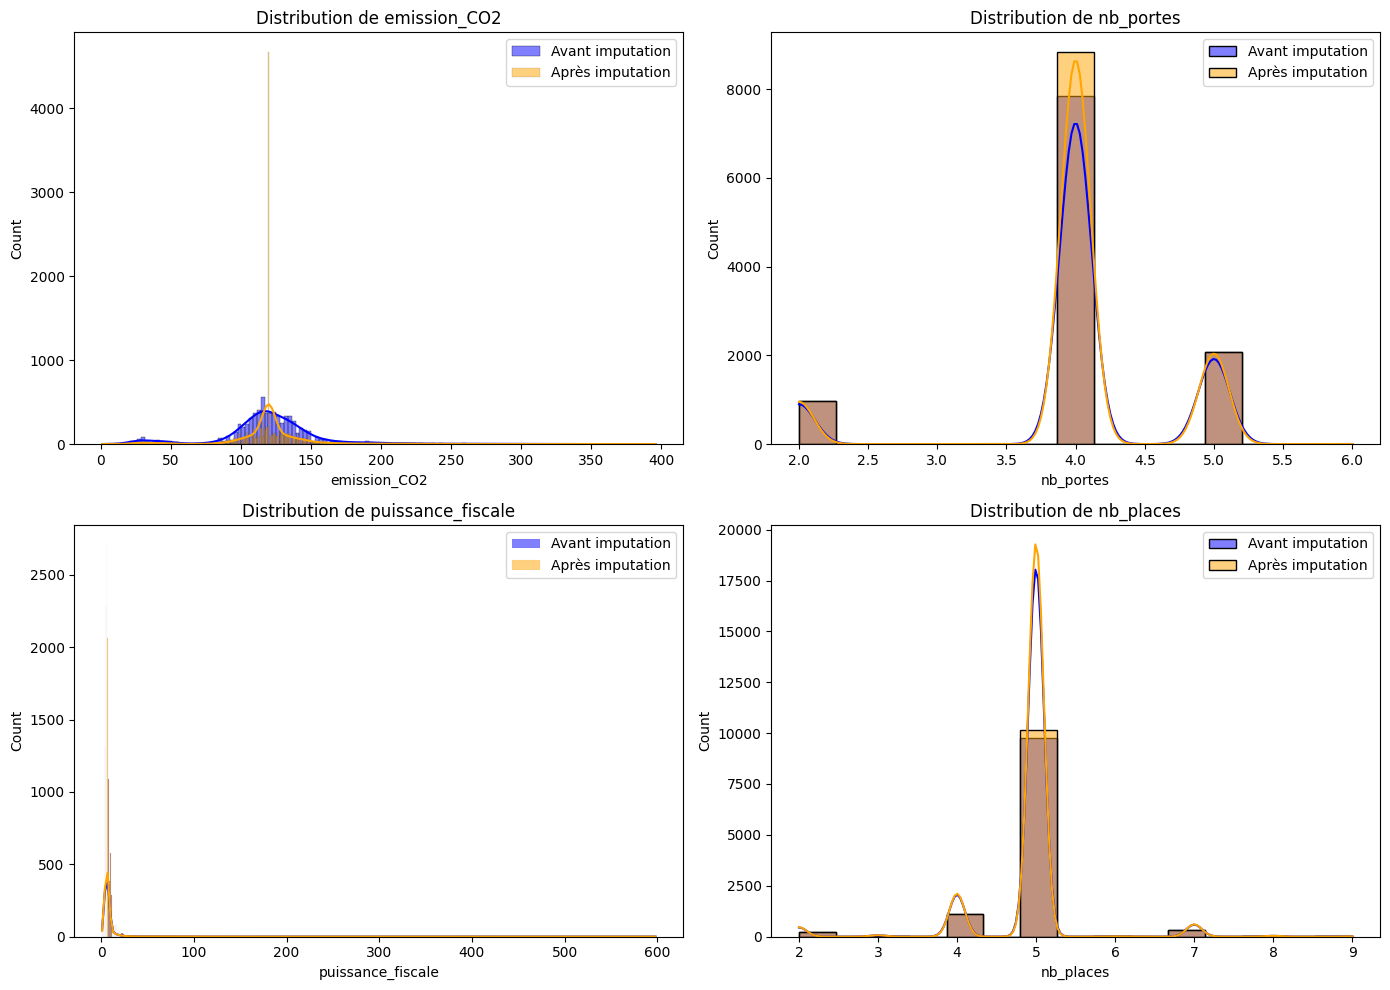

In [645]:
variables = ['emission_CO2', 'nb_portes', 'puissance_fiscale', 'nb_places']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axes.flatten(), variables):
    # Tracer la distribution avant imputation
    sns.histplot(pvendu[var].dropna(), kde=True, ax=ax, color='blue', label='Avant imputation')
    

    # Tracer la distribution après imputation
    sns.histplot(pvendu_imputed[var], kde=True, ax=ax, color='orange', label='Après imputation')
    
    ax.set_title(f'Distribution de {var}')
    ax.legend()

plt.tight_layout()
plt.show()

Graphiquement on observe que globalement l'imputation n'a que faiblement impacté la variabilité des données. La dispersion des données est quasi identique. Il convient tout de même de revoir l'imputation de la variable "emission_co2" pour laquelle on a une dispersion réduite des données après imputation.

In [646]:
X_train, X_test, y_train, y_test = train_test_split(pvendu.drop(columns=['prix']), pvendu['prix'], test_size =0.2,
                                                                       random_state = 91)

In [647]:
co2_median = X_train.groupby('marque')['emission_CO2'].median()


X_train['emission_CO2'] = X_train.apply(lambda row: co2_median[row['marque']] if pd.isnull(row['emission_CO2']) else row['emission_CO2'], axis=1)
X_train['nb_portes'] = X_train['nb_portes'].fillna(nb_portes_median)
X_train['puissance_fiscale'] = X_train['puissance_fiscale'].fillna(puissance_fiscale_median)
X_train['nb_places'] = X_train['nb_places'].fillna(nb_places_median)

In [648]:
X_test['emission_CO2'] = X_test.apply(lambda row: co2_median[row['marque']] if pd.isnull(row['emission_CO2']) else row['emission_CO2'], axis=1)
X_test['nb_portes'] = X_test['nb_portes'].fillna(nb_portes_median)
X_test['puissance_fiscale'] = X_test['puissance_fiscale'].fillna(puissance_fiscale_median)
X_test['nb_places'] = X_test['nb_places'].fillna(nb_places_median)

In [649]:
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])
pvendu_imputed = pd.concat([X_full, y_full], axis=1).sort_index()

In [650]:
pvendu_imputed.isnull().sum()

marque               0
annee                0
kilometrage          0
energie              0
emission_CO2         0
transmission         0
nb_portes            0
puissance_fiscale    0
nb_places            0
carrosserie          0
crit_air             0
modele               0
prix                 0
dtype: int64

In [651]:
pvendu.describe()

,prix,annee,kilometrage,emission_CO2,nb_portes,puissance_fiscale,nb_places,crit_air
count,11899.000000,11899.000000,11899.000000,7396.000000,10911.000000,10966.000000,11480.0000,11899.000000
mean,26553.665098,2018.679049,61401.666106,121.152109,4.012556,7.607697,4.8973,1.277670
std,31564.261044,4.419023,50845.739413,37.531614,0.740555,10.896036,0.6496,0.642435
min,749.000000,1962.000000,50.000000,1.000000,2.000000,1.000000,2.0000,0.000000
25%,13900.000000,2017.000000,20889.500000,108.000000,4.000000,5.000000,5.0000,1.000000
50%,19490.000000,2020.000000,50100.000000,120.000000,4.000000,6.000000,5.0000,1.000000
75%,27999.000000,2021.000000,89927.000000,135.000000,4.000000,8.000000,5.0000,2.000000
max,718400.000000,2024.000000,999999.000000,396.000000,6.000000,598.000000,9.0000,5.000000


In [652]:
pvendu_imputed.describe()

,annee,kilometrage,emission_CO2,nb_portes,puissance_fiscale,nb_places,crit_air,prix
count,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000,11899.000000
mean,2018.679049,61401.666106,123.061728,4.011514,7.481637,4.900916,1.277670,26553.665098
std,4.419023,50845.739413,34.099921,0.709150,10.469026,0.638340,0.642435,31564.261044
min,1962.000000,50.000000,1.000000,2.000000,1.000000,2.000000,0.000000,749.000000
25%,2017.000000,20889.500000,115.000000,4.000000,5.000000,5.000000,1.000000,13900.000000
50%,2020.000000,50100.000000,120.000000,4.000000,6.000000,5.000000,1.000000,19490.000000
75%,2021.000000,89927.000000,133.000000,4.000000,8.000000,5.000000,2.000000,27999.000000
max,2024.000000,999999.000000,396.000000,6.000000,598.000000,9.000000,5.000000,718400.000000


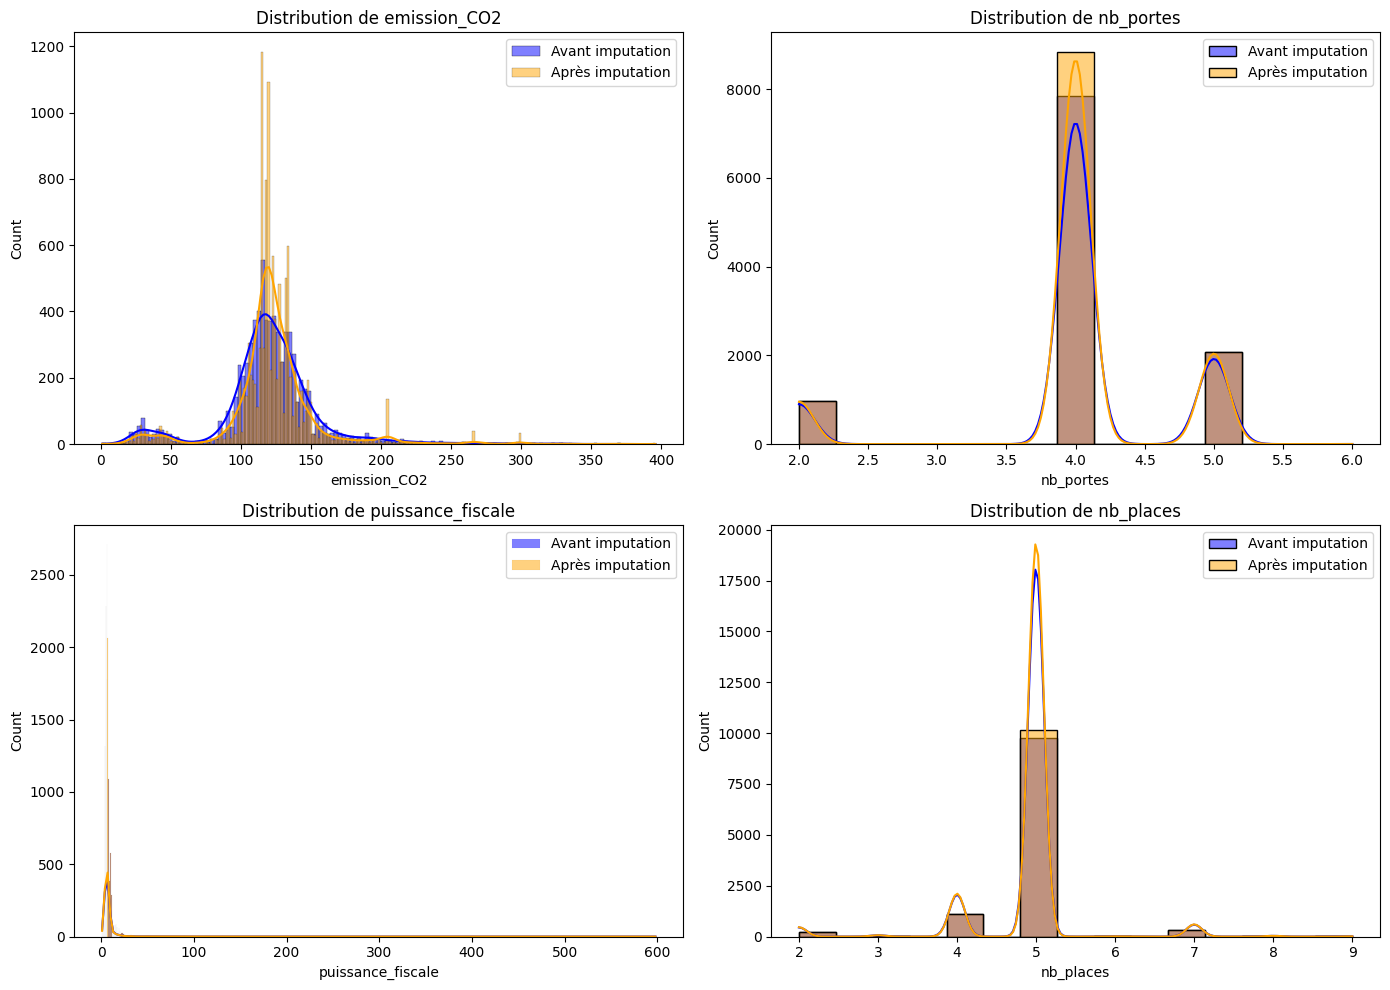

In [653]:
variables = ['emission_CO2', 'nb_portes', 'puissance_fiscale', 'nb_places']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axes.flatten(), variables):
    # Tracer la distribution avant imputation
    sns.histplot(pvendu[var].dropna(), kde=True, ax=ax, color='blue', label='Avant imputation')
    

    # Tracer la distribution après imputation
    sns.histplot(pvendu_imputed[var], kde=True, ax=ax, color='orange', label='Après imputation')
    
    ax.set_title(f'Distribution de {var}')
    ax.legend()

plt.tight_layout()
plt.show()

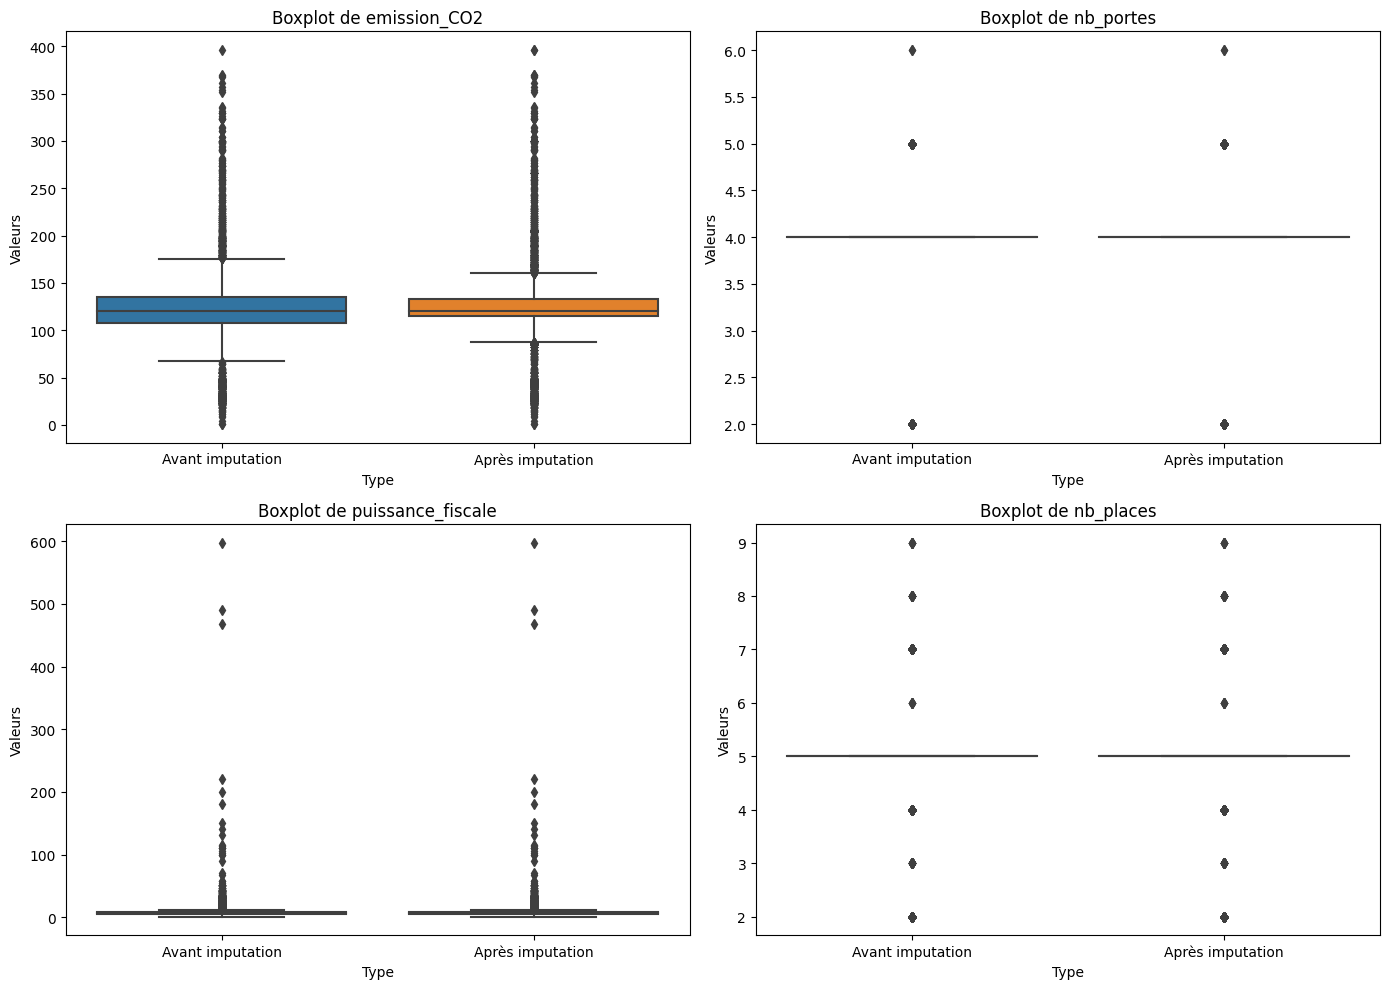

In [654]:
variables = ['emission_CO2', 'nb_portes', 'puissance_fiscale', 'nb_places']

# Création des sous-intrigues
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, var in zip(axes.flatten(), variables):
    # Créer un DataFrame pour les données originales et imputées
    data_to_plot = pd.DataFrame({
        'Valeurs': pd.concat([pvendu[var], pvendu_imputed[var]], axis=0),
        'Type': ['Avant imputation'] * len(pvendu[var]) + ['Après imputation'] * len(pvendu_imputed[var])
    })
    
    # Tracer les boxplots
    sns.boxplot(x='Type', y='Valeurs', data=data_to_plot, ax=ax)
    
    ax.set_title(f'Boxplot de {var}')

plt.tight_layout()
plt.show()

En observant graphiquement les différentes distributions des données avant et après imputation à l'aide des boxplots, on s'aperçoit qu'elles sont quasi similaires. Aucune distorsion notable n'est observée, ce qui indique que l'imputation par la médiane n'a pas introduit de biais significatif dans les données. Les distributions des variables restent cohérentes, ce qui valide l'efficacité de la méthode d'imputation utilisée